So far, only the use of first-order derivatives has been discussed in this chapter. However, the process with first-order derivatives can be slow with some error surfaces. The problem is caused by the nature of <font color='red'>curvature</font> (i.e., <font color='blue'>second-order derivatives</font>, <font color='orange'>changing gradient</font>), where the first-order gradient does not contain the information needed to control the size of the update.

<font color='red'>In general, second-order methods approximate the local loss surface with a quadratic bowl, which is more accurate than the linear approximation.</font> Some second-order methods like the *Newton-methods* require exactly one iteration in order to find the local optimal solution for a quadratic surface. Of course, the loss surface of neural method is typically not quadratic. Nevertheless, the approximation is often good enough that gradient-descent methods are **greatly accelerated** at least in cases where the change in the gradient is not too sudden or drastic.


# Second-Order derivatives

Consider a parameter vector $W = (w_1 \cdots w_d)^T$, which is expressed as a column vector. Its gradient (i.e. first-order derivatives vector) of the loss function $L(W)$ is denoted by

$$G =\nabla L(W)= \left(\frac{\partial L(W)}{\partial w_1} \cdots \frac{\partial L(W)}{\partial w_d}\right)^T$$

And the second-order derivatives of the loss function are of the following form

$$H =\nabla \nabla L(W)= \begin{bmatrix}
\frac{\partial^2 L(W)}{\partial w_1\partial w_1} &\frac{\partial^2 L(W)}{\partial w_1\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_1\partial w_d}\\
\frac{\partial^2 L(W)}{\partial w_2\partial w_1} &\frac{\partial^2 L(W)}{\partial w_2\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_2\partial w_d}\\
\vdots &\vdots &\ddots &\vdots\\
\frac{\partial^2 L(W)}{\partial w_d\partial w_1} &\frac{\partial^2 L(W)}{\partial w_d\partial w_2} &\cdots &\frac{\partial^2 L(W)}{\partial w_d\partial w_d}\\
\end{bmatrix}$$

which is called *Hessian matrix*.

## Quadratic approximation and Newton update
One can write a quadratic approximation of the loss function in the vicinity of parameter vector $W_0$ by using the following Taylor expansion

$$L(W) \approx L(W_0) + (W-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W-W_0)^T H (W- W_0)$$

Where

- $W_0$ is the current parameter vector.
- $W$ is the vincinity of $W_0$.
- $\nabla L(W_0)$ is the gradient computed at $W_0$.
- $H$ is the Hessian computed at $W_0$.

For a quadratic loss function, the loss surface is a bowl, and we can use the Newton update to reach the bottom of the bowl in a single step.
$$\begin{align*}
\nabla L(W^*) &= \nabla \Big\{ L(W_0) + (W^*-W_0)^T[\nabla L(W_0)]+\frac{1}{2}(W^*-W_0)^T H (W^*- W_0) \Big\}\\
0 &= \nabla L(W_0) + H(W^*-W_0)\\
\Rightarrow W^* &= W_0 - H^{-1}[\nabla L(W_0)]
\end{align*}$$

However, in most cases, the loss function is more complicated, so that Newton method without learning rate can easily lead to gradient explosion, which does not meet our needs.

## Improvement from first-order to second-order

Comparing to the steepest-gradient descent, the second-order method (Newton update) premultiplies the gradient with the inverse of the Hessian. This premultiplication plays a key role in changing the direction of the steepest-graident towards low-curvature directions, because the Hessain matrix comprises the changing rate of every directions for each element in the gradient. This property can greatly accelerate the learning procedure and keep it from suffering oscillation in valley.

Also, the learning rate is already incorporated into the Hessian matrix implicitly, so that we don't need to determine the learning rate during the learning process.




## Limitation

In most large-scale neural network settings, the Hessian is too large to store or compute explicitly. It is not uncommon to have neural networks with millions of parameters. Trying to compute the inverse of a $10^6\times 10^6$ Hessian matrix is impractical with the computational power today. In fact, it is difficult to even compute the Hessian, let alone invert it!

Therefore, many approximations and variations of the Newton method have been developed.

-------------

# Line search along eigenvectors

An intuitive perspective for finding the optimum vector of the bowl given by a Hessian is to make the best (projected) gradient-descent step along each eigenvector so as to minimize the loss function. The best movement along a particular diretion is done using line search to select the step size.

------------------

# Conjugate Gradients
Traditional <a href='https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf'>conjugate gradients</a> algorithm is for solving the linear algebra problem, which is equivalent to minimizing quadratic functions. It has the procedure as follows.

|Step|Pseudocode|Description|
|----|----------|-----------|
|<img width=30/>|<img width=200/>|<img width=200/>|
|1| $\alpha_k = r_{k-1}^T r_{k-1}/d_{k}^T A d_{k}$ | Step length to next $x_k$ |
|2| $x_k = x_{k-1} + \alpha_k d_{k}$ | Approximate solution |
|3| $r_k = r_{k-1} - \alpha_k A d_k$ | New residual |
|4| $\beta_{k+1} = r_k^T r_k/ r_{k-1}^T r_{k-1}$ | Weight of $d_k$ for next direction |
|5| $d_{k+1} = r_k + \beta_{k+1}d_k$ | Next search direction |




However, for the non-linear problem like deep leaning, we need to reformulate the algorithm. There are two difference from the linear case.
1. Because $Ae_i$ is no longer equal to the residual $r_i$, or say negative gradient, we therefore need to compute the step size denoted by $\alpha$ using another method called line search.
2. For the reason that $\alpha$ has changed, $\beta$ can only be computed using its original form
$$\beta = \frac{r_i^T A d_i}{d_i^T A d_i}$$


## Determine the best step size (line search)

The main idea of *line search* is to find the point which has the gradient orthogonal to the current search direction.

$$g(W_{k+1}) = (W_{k+1}-W_{k})^T \nabla L(W_{k+1}) = cd_{k+1}^T r_{k+1} = 0$$

where we have defined the multiplication of the direction and the new gradient as a function $g(\cdot)$. Then our goal turns out to be finding the point that makes this function zero. We will introduce 3 methods here.

### Bisection method
1. Choose two points $a$ and $b$ on the search line that make $g(a) > 0$ and $g(b) < 0$.
2. Compute $g(c)$, where $c=\frac{a+b}{2}$ is the middle point of $a$ and $b$.
3. If the sign of $g(c) > 0$, which indicates that the zero point is in $(b, c)$, thus set $a = c$.
4. If the sign of $g(c) < 0$, which indicates that the zero point is in $(a, c)$, thus set $b = c$.
5. Run the steps $2$ to $4$ iteratively until convergence.


### Secant method
1. Choose two points $a$ and $b$ on the search line that make $g(a) > 0$ and $g(b) < 0$.
2. Compute $g(x)$, where $x$ is the intersection point of the line $g=0$ and the line that go through $g(a)$ and $g(b)$. $x$ therefore has the following expression.
$$\frac{g(b)-g(a)}{b-a}(x-a)+g(a)=0\Rightarrow x = a-\frac{b-a}{g(b)-g(a)}g(a)$$
3. If the sign of $g(x) > 0$, which indicates that the zero point is in $(b, x)$, thus set $a = x$.
4. If the sign of $g(x) < 0$, which indicates that the zero point is in $(a, x)$, thus set $b = x$.
5. Run the steps $2$ to $4$ iteratively until convergence.



### Dekker's method
Unlike the previous two methods, Dekker's method keeps track of three points:
- $a_k$: the current "contrapoint"
- $b_k$: the current guess for the root
- $b_{k-1}$: the previous guess for the root



1. Choose two points $a_0$ and $b_0$ on the search line that make $g(a_0) > 0$ and $g(b_0) < 0$, and define $g(b_{-1}) = g(a)$
2. Compute $c$ using Biection method with $a_k$ and $b_k$.
3. Compute $x$ using Secant method with $b_{k-1}$ and $b_k$.
4. If $c$ is between $x$ and $b_k$ then let $b_{k+1} = c$, otherwise let $b_{k+1} = x$.
5. Check convergence of $g(b_{k+1})$. Stop if convergent.
6. Choose $a_{k+1}$ from $a_k$ and $b_{k}$ such that it has the different sign with $b_{k+1}$.
7. If $g(b_{k+1}) > g(a_{k+1})$ then swap.
8. Run the steps $2$ to $7$ repeatively.



## <font color='#cccccc'>Determine the best direction (first-order)</font>
<font color='#cccccc'>
If we want to compute $\beta$ with only the first-order calculation, we can assume that we are solving the linear problem. Thus 

$$r_k-r_{k-1} = (b-Ax_k)-(b-Ax_{k-1}) = -A(x_k-x_{k-1}) = -cAd_k$$

Substitude into the euqation of $\beta$, we obtain

$$\beta = \frac{r_k^T A d_k}{d_k^T A d_k} = \frac{r_k^T(r_k - r_{k-1})}{d_k^T (r_k - r_{k-1})}$$

</font>


*However, for each interation, we need to calculate the new derivatives of candidate points $\nabla L(W_{k+1})$ multiple times, which increases our learning time to such a large amount that this method is quite impractical.*

--------------

# Hessian-Free Optimization







----------------------

# Quasi-Newton Methods and BFGS







-----------------------

# Problems with Second-Order Methods:Saddle Points







<IPython.core.display.Javascript object>


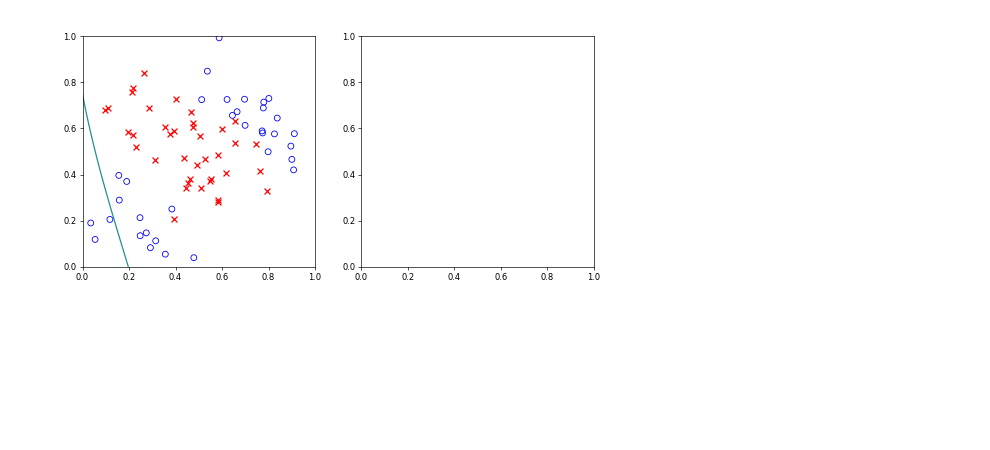

Line search!!!!
weight is 
 [ 0.26167542 -0.85080183  0.85234346 -0.00184661 -0.11904633  0.1509659
  0.00412405 -0.00918869  0.00337936 -0.30739911  1.00237444 -0.25618906
 -0.01313312]
derivatives is 
 [-1.4166472  -0.67799207  2.8288154   0.32298073 -1.30958151 -0.52061547
 -2.63939303  5.88075922 -2.16279143 -0.50168278  3.62437895 -0.31559423
  8.40519399]
Line search!!!!
weight is 
 [ 0.2627185  -0.85031661  0.85026617 -0.00202061 -0.11808347  0.15133287
  0.00605573 -0.01345629  0.00495584 -0.30709554  0.99973805 -0.25596229
 -0.01926365]
derivatives is 
 [-1.35382978 -0.61211561  2.68912007  0.14529462 -1.24795879 -0.45564127
 -2.49237143  5.46022752 -2.02596303 -0.31093996  3.38111774 -0.28725901
  7.88346322]
Line search!!!!
weight is 
 [ 0.26322877 -0.85008604  0.84925291 -0.00207471 -0.11761314  0.15150446
  0.00699505 -0.01551348  0.00571929 -0.30697863  0.99846345 -0.25585377
 -0.02223432]
derivatives is 
 [-1.3246848  -0.58144027  2.62298568  0.06217809 -1.21923715 -0.42

Line search!!!!
weight is 
 [ 0.26989583 -0.8474554   0.83624335 -0.00103562 -0.11151791  0.15330252
  0.01895479 -0.04061009  0.0152489  -0.30716228  0.98257905 -0.25451799
 -0.05939068]
derivatives is 
 [-1.14767535 -0.39121549  2.1933236  -0.45967623 -1.03957754 -0.23845615
 -2.00895924  4.02440279 -1.56743272  0.297167    2.62233176 -0.22437167
  6.12092739]
Line search!!!!
weight is 
 [ 2.70118007e-01 -8.47379672e-01  8.35818748e-01 -9.46600140e-04
 -1.11316659e-01  1.53348676e-01  1.93437053e-02 -4.13891475e-02
  1.55523384e-02 -3.07219834e-01  9.82071386e-01 -2.54474546e-01
 -6.05756127e-02]
derivatives is 
 [-1.14244787 -0.38548349  2.17991886 -0.47546229 -1.03414499 -0.23286217
 -1.99665132  3.9867943  -1.55557615  0.31222592  2.60385849 -0.22339019
  6.07510348]
Line search!!!!
weight is 
 [ 2.70339176e-01 -8.47305053e-01  8.35396744e-01 -8.54522941e-04
 -1.11116458e-01  1.53393749e-01  1.97302373e-02 -4.21609227e-02
  1.58534778e-02 -3.07280300e-01  9.81567300e-01 -2.5443129

Line search!!!!
weight is 
 [ 2.72498878e-01 -8.46621438e-01  8.31316538e-01  2.47645854e-04
 -1.09169772e-01  1.53782747e-01  2.34688067e-02 -4.94766197e-02
  1.87402057e-02 -3.08055326e-01  9.76716986e-01 -2.54007042e-01
 -7.30303562e-02]
derivatives is 
 [-1.08597381 -0.32301221  2.03224713 -0.64730497 -0.97492823 -0.17217819
 -1.86341466  3.57669387 -1.42670816  0.47360201  2.40671432 -0.21478429
  5.57638714]
Line search!!!!
weight is 
 [ 2.72604463e-01 -8.46590034e-01  8.31118953e-01  3.10584178e-04
 -1.09074984e-01  1.53799486e-01  2.36499778e-02 -4.98243618e-02
  1.88789174e-02 -3.08101375e-01  9.76482992e-01 -2.53986159e-01
 -7.35725202e-02]
derivatives is 
 [-1.08366154 -0.32043169  2.02608852 -0.65438893 -0.97248302 -0.16968461
 -1.85794775  3.55975792 -1.42140207  0.48015486  2.39873804 -0.21451063
  5.55582761]
Line search!!!!
weight is 
 [ 2.72709822e-01 -8.46558881e-01  8.30921966e-01  3.74211255e-04
 -1.08980434e-01  1.53815983e-01  2.38306175e-02 -5.01704573e-02
  1.90

KeyboardInterrupt: 

In [36]:

# for showing iteratively
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import warnings

# convert warnings to error
warnings.filterwarnings("ignore")

# learning rate decay
epoch_t = 0

# conjugate gradient algorithm
q0 = None

count = 0
H_count = 0

TRAIN_FINISHED = 100000

LT = 5000
LR = 0.1
X = None
Y = None
x = None
y = None
cont = None
levels = None

Gaussian = lambda t, mu, sigma: 1.0/(sigma*np.sqrt(2*np.pi))*np.exp(-(t-mu)**2/(2*sigma**2))

class EXP_TRAIN_FINISHED(Exception):
    pass

A = None
F = None
def Adam(derivatives):
    a0 = 0.1
    rf = 0.9
    r = 0.999
    global A, F
    if A is None:
        A = np.full(derivatives.shape, 0)
        F = np.full(derivatives.shape, 0)
    A = r*A + (1-r)*derivatives**2
    F = rf*F + (1-rf)*derivatives
    at = a0 * (np.sqrt(1-r)/(1-rf))
    return -at/(np.sqrt(A)+1e-8)*F

def tanh(a):
    y = np.tanh(a)
    return y

def dtanh(o):
    y = 1-o**2
    return y

def sigmoid(a):
    y = 1.0/(1.0+np.exp(-a))
    return y

def dsigmoid(o):
    y = o*(1-o)
    return y

def compute_weights_error(derivatives, variance):
    ret = LR * variance * derivatives
    return ret

class Layer:
    network = None
    unit_number = 0
    outputs = None
    errors = None
    weights = None
    derivatives = None
    prev_layer = None
    next_layer = None
    variance = 0.0
    
    w_start = 0
    b_start = 0
    act_errors = None
    
    act_func = tanh
    link_func = dtanh
    
    def __init__(self, K, afunc=tanh, lfunc=dtanh):
        self.unit_number = K
        self.outputs = np.zeros(K)
        self.errors = np.zeros(K)
        self.act_errors = np.zeros(K)
        self.act_func = afunc
        self.link_func = lfunc
        
    def build_connection(self, network):
        self.network = network
        j = self.prev_layer.unit_number
        self.variance = 1.0/(j * self.unit_number)
        
        w_size = self.unit_number * j
        self.w_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.random.normal(0, np.sqrt(self.variance), w_size)))
        self.network.w_size += w_size
        
        b_size = self.unit_number
        self.b_start = self.network.w_size
        self.network.weights = np.hstack((self.network.weights, np.zeros(b_size)))
        self.network.w_size += b_size
        
    def forward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            for j in range(self.prev_layer.unit_number):
                s += self.prev_layer.outputs[j] * self.network.weights[self.w_start+k*self.prev_layer.unit_number+j]
            s += self.network.weights[self.b_start + k]
            self.outputs[k] = self.act_func(s)

    def backward_propagation(self):
        for k in range(self.unit_number):
            s = 0.0
            a = 0.0
            for l in range(self.next_layer.unit_number):
                s += self.next_layer.errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
                a += self.next_layer.act_errors[l] * self.network.weights[self.next_layer.w_start+l*self.unit_number+k]
            self.errors[k] = self.link_func(self.outputs[k]) * s
            self.act_errors[k] = self.link_func(self.outputs[k]) * a
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def dump(self):
        print("outputs {}".format(self.outputs))
        print("errors {}".format(self.errors))
        print("weights {}".format(self.weights))
        print("derivatives {}".format(self.derivatives))

# Mixture Gaussian Parameters Layer
class OutputLayer(Layer):
    targets = None
            
    def backward_propagation(self):
        self.errors = self.outputs-self.targets
        self.act_errors = np.ones(self.act_errors.shape)
        for k in range(self.unit_number):
            for j in range(self.prev_layer.unit_number):
                self.network.derivatives[self.w_start+k*self.prev_layer.unit_number+j] += self.errors[k] * self.prev_layer.outputs[j]
                self.network.b[self.w_start+k*self.prev_layer.unit_number+j] = self.act_errors[k] * self.prev_layer.outputs[j]
            self.network.derivatives[self.b_start+k] += self.errors[k]
            self.network.b[self.b_start+k] = self.act_errors[k]
            
    def update_target(self, t):
        self.targets = t

class InputLayer(Layer):
    outputs = None
    unit_number = 0
    prev_layer = None
    next_layer = None
    
    def __init__(self, K):
        self.unit_number = K
        
    def build_connection(self, network):
        self.network = network
        return
        
    def update_input(self, inputs):
        self.outputs = inputs

class Network:
    input_layer = None
    output_layer = None
    inputs = None
    targets = None
    hessian = None
    weights = None
    derivatives = None
    direction = None
    b = None
    w_size = 0
    observations = None
    targets = None
    
    def __init__(self):
        self.weights = np.array([])
        return
    
    def add_layer(self, layer):
        if self.input_layer == None:
            self.input_layer = layer
        else:
            layer.prev_layer = self.output_layer
            self.output_layer.next_layer = layer
            
        self.output_layer = layer
        layer.build_connection(self)
        
    def init_finished(self):
        self.derivatives = np.zeros(self.w_size)
        self.hessian = np.zeros((self.w_size, self.w_size))
        self.b = np.zeros(self.w_size)
        
    def update_hessian(self):
        b = self.b.reshape(-1, 1)
        y = self.output_layer.outputs[0]
        self.hessian += y * (1-y) * (b @ b.T)
        
    def compute_finite_derivatives(self, observations, targets):
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
    
    def compute_hessian_with_derivatives(self):
        e = 1e-8
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            error = np.zeros(self.derivatives.shape)
            self.weights[i] += e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error += self.derivatives
            self.weights[i] -= 2*e
            self.derivatives *= 0
            self.compute_finite_derivatives(self.observations, self.targets)
            error -= self.derivatives
            self.hessian[i] = error/(2*e)
            self.weights[i] += e
        self.derivatives = np.copy(derivatives)
        #print("compute with derivatives\n", self.hessian)
        
    def compute_hessian_with_error(self):
        e = 1e-5
        derivatives = np.copy(self.derivatives)
        length = len(self.weights)
        for i in range(length):
            for j in range(length):
                if j < i:
                    continue
                error = 0.0
                self.weights[i] += e
                self.weights[j] += e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += 2*e
                self.weights[j] -= 2*e
                error -= self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] -= 2*e
                error += self.Get_Error(self.observations, self.targets, 0)
                self.weights[i] += e
                self.weights[j] += e
                self.hessian[i][j] = error/(4*e**2)
                self.hessian[j][i] = self.hessian[i][j]
                
        self.derivatives = np.copy(derivatives)
        #print("compute with error\n", self.hessian)
        #raise EXP_TRAIN_FINISHED("Test")
                
    def conjugate_gradient(self, derivatives, hessian, direction):
        backup_derivatives = np.copy(self.derivatives)
        backup_weights = np.copy(self.weights)
        
        residual = -derivatives
        if H_count != 1:
            beta = (residual @ hessian @ direction)/(direction @ hessian @ direction)
            direction = residual + beta * direction
        ret = 0.0
        
        # line search
        g0 = -self.derivatives @ direction
        a = 0.0
        b = 0.0
        if g0 < 0:
            step_size = -0.2
        else:
            step_size = 0.2
        for i in range(100):
            self.weights += step_size * direction
            
            self.Get_Derivatives(self.observations, self.targets)
            g1 = -self.derivatives @ direction
            if g0 * g1 < 0:
                print("Line search!!!!")
                if g1 < 0:
                    a = self.weights-step_size * direction
                    b = self.weights
                else:
                    b = self.weights-step_size * direction
                    a = self.weights
                for j in range(100):
                    self.weights = (a + b)/2
                    self.Get_Derivatives(self.observations, self.targets)
                    g2 = -self.derivatives @ direction
                    if np.abs(g2) < 1e-8:
                        break
                    if g2 < 0:
                        b = self.weights
                    else:
                        a = self.weights
                break
            
        ret = self.weights - backup_weights
        
        self.derivatives = np.copy(backup_derivatives)
        self.weights = np.copy(backup_weights)
        return ret, direction

    def update(self, update_weight):
        #self.update_hessian()
        if update_weight == 1:
            if np.allclose(self.derivatives, np.zeros(self.w_size)):
                raise EXP_TRAIN_FINISHED("Train finished")
            
            # Adam
            global count, H_count
            if count<0:
                count += 1
                ret = Adam(self.derivatives)
            else:
            # Conjugate Gradients algorithm
                #self.compute_hessian_with_error()
                if H_count % 1 == 0:
                    self.compute_hessian_with_derivatives()
                H_count += 1
                if self.direction is None:
                    self.direction = -np.copy(self.derivatives)
                ret, self.direction = self.conjugate_gradient(self.derivatives, self.hessian, self.direction)
                #ret = (-np.linalg.inv(self.hessian) @ self.derivatives)
            
            self.weights += ret
            print("weight is \n", self.weights)
            print("derivatives is \n", self.derivatives)
            self.derivatives *= 0
            #self.hessian *= 0
        return 1
        
    def train(self, observations, targets):
        self.observations = observations
        self.targets = targets
        
        N = len(observations)
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
            
            # gradient descent/stotastic gradient descent
            if n == N-1:
                update_weight = 1
            else:
                update_weight = 0
            self.update(update_weight)

    def Get_Derivatives(self, observations, targets):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
                
            layer = self.output_layer
            while layer != self.input_layer:
                layer.backward_propagation()
                layer = layer.prev_layer
        
    def Get_Error(self, observations, targets, show):
        N = len(observations)
        es = 0.0
        for n in range(N):
            self.input_layer.update_input(observations[n])
            self.output_layer.update_target(targets[n])
            
            layer = self.input_layer.next_layer
            while layer != None:
                layer.forward_propagation()
                layer = layer.next_layer
            #print("target {}".format(self.targets))
            #print("output {}".format(self.output_layer.outputs))
            #e = np.sum(self.targets * np.log(self.output_layer.outputs))
            # for sigmoid only
            if targets[n] == 0:
                e = np.log(1 - self.output_layer.outputs[0])
            else:
                e = np.log(self.output_layer.outputs[0])
            es += e
            if show == 1:
                print(self.targets, self.output_layer.outputs)
        return -es
                
    def test(self, new_input):
        self.input_layer.update_input(new_input)
        
        layer = self.input_layer.next_layer
        while layer != None:
            layer.forward_propagation()
            layer = layer.next_layer
        return self.output_layer.outputs
    
    def dump(self):
        layer = self.input_layer.next_layer
        while layer != None:
            layer.dump()
            layer = layer.next_layer
        return

def gen_training_data(ax):
    mean1 = [0.2, 0.2]
    cov1 = [[0.03, -0.01], 
           [-0.01, 0.02]]
    X1 = np.random.multivariate_normal(mean1, cov1, 20)

    mean12 = [0.7, 0.7]
    cov12 = [[0.01, -0.01], 
           [-0.01, 0.02]]
    X12 = np.random.multivariate_normal(mean12, cov12, 20)
    X1 = np.vstack((X1, X12))
    T1 = np.zeros(len(X1))
    
    mean2 = [0.4, 0.6]
    cov2 = [[0.03, -0.02], 
           [-0.02, 0.04]]
    X2 = np.random.multivariate_normal(mean2, cov2, 40)
    T2 = np.ones(len(X2))
    
    ax.scatter(X1.T[0], X1.T[1], s=50,  facecolors='none', edgecolors='blue')
    ax.scatter(X2.T[0], X2.T[1], s=50,  facecolors='red', edgecolors='none', marker='x')
    
    X = np.vstack((X1, X2))
    T = np.hstack((T1, T2))
    return X, T

def show_pic(network, ax, fig, init=0):
    global x, y, X, Y, Z, cont, levels
    if init == 1:
        x = np.linspace(0,1,20)
        y = np.linspace(0,1,20)
        X, Y = np.meshgrid(x, y)
        levels = np.arange(0.1, 1.1, 0.2)
    
    Z = np.zeros(X.shape)
    for i in range(len(y)):
        for j in range(len(x)):
            Z[i][j] = network.test([x[j], y[i]])
    if init != 1:
        for coll in cont.collections: 
            coll.remove()
    cont = ax.contour(X, Y, Z, levels=levels) 
    fig.canvas.draw()
    
def training_show_process(network, X, T, fig, ax):
    show_pic(network, ax, fig, 1)

    for i in range(LT):
        network.train(X, T)
        if i % 10 != 9:
            show_pic(network, ax, fig)
    return

def build_network():
    network = Network()
    ilayer = InputLayer(2)
    network.add_layer(ilayer)
    layer1 = Layer(3)
    network.add_layer(layer1)
    # layer2 = Layer(5)
    # network.add_layer(layer2)
    olayer = OutputLayer(1, sigmoid, dsigmoid)
    network.add_layer(olayer)
    network.init_finished()
    return network

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    X, T = gen_training_data(ax1)
    network = build_network()
    try:
        training_show_process(network, X, T, fig, ax1)
    except EXP_TRAIN_FINISHED:
        show_pic(network, ax1, fig)
        raise

if __name__=="__main__":
    main()